<a href="https://colab.research.google.com/github/IIbitoye/FDSfE_IIbitoye/blob/main/Classwork/ITE_11_10_20222_NLP_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

In [5]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [ ]:
!kaggle datasets list

In [8]:
!mkdir sentimentanalysis

In [ ]:
cd sentimentanalysis/

In [10]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 83.3MB/s]


In [11]:
!ls *

sentiment-analysis-on-movie-reviews.zip


In [12]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: test.tsv.zip            
  inflating: train.tsv.zip           


In [15]:
!ls *

sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip


In [16]:
reviews = pd.read_csv("train.tsv.zip", sep="\t")

In [ ]:
reviews 

In [ ]:
reviews=reviews.groupby("SentenceId").first()
reviews

In [23]:
reviews.shape

(8529, 3)

In [24]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

list comprehension

In [ ]:
tmp_= []
for i in range(10):
  tmp_.append(i)
tmp_

In [ ]:
[i for i in range(10)]

In [41]:
for phrase in reviews["Phrase"].values[:10]:
  print(len(phrase.split()))

37
11
21
26
7
19
10
20
9
9


In [47]:
np.sum([len(phrase.split()) for phrase in reviews["Phrase"].values])

162044

In [51]:
sum=np.sum([len(phrase.split()) for phrase in reviews["Phrase"].values])
sum

162044

In [ ]:
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(sum))

In [54]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

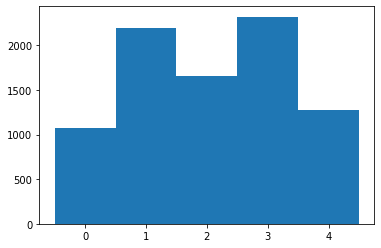

In [55]:
#plot sentiment histogram
plt.hist(reviews["Sentiment"],bins=[-0.5, 0.5, 1.5, 2.5, 3.5,4.5]);

In [56]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=d263ed980d2212c132fbda9bd1cda0b1d90793f49b01f6ddd6767fb325da4e4c
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [57]:
from nltk.tokenize import word_tokenize


In [58]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [60]:
#NLP packs
import nltk
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
from stop_words import get_stop_words
#from textblob import TextBlob , Word
#import re 
#import string

In [ ]:
#remove some characters like new line from the strings
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

In [ ]:
reviews['Phrase']

# lets talk about the lambda construct and apply

In [63]:
def times2(x):
  return x*2

In [64]:
times2(4)

8

In [65]:
lambda x: x*2

<function __main__.<lambda>(x)>

In [ ]:
reviews['Phrase'] = reviews['Phrase'].apply( lambda x:word_tokenize(x)) # sentence -> words
reviews['Phrase']

# lets talk about stop words... and list comprehensions

In [67]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [68]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x: [word for word in x if word not in STOPWORDS]) # stop words removal


In [69]:
reviews["Phrase"]

SentenceId
1       [series, escapades, demonstrating, adage, good...
2       [quiet, introspective, entertaining, independe...
3       [even, fans, ismail, merchant, s, work, suspec...
4       [positively, thrilling, combination, ethnograp...
5       [aggressive, selfglorification, manipulative, ...
                              ...                        
8540    [either, re, willing, go, claustrophobic, conc...
8541    [despite, annoyances, capable, clayburgh, tamb...
8542    [lrb, tries, rrb, parody, genre, s, already, j...
8543    [movie, s, downfall, substitute, plot, persona...
8544    [film, darkly, atmospheric, herrmann, quietly,...
Name: Phrase, Length: 8529, dtype: object

# Frequency of words

In [70]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('s', 2558),
 ('film', 1150),
 ('movie', 969),
 ('nt', 680),
 ('one', 553),
 ('rrb', 352),
 ('lrb', 351),
 ('story', 347),
 ('will', 265),
 ('good', 264)]

In [71]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x: [word for word in x if len(word)>3]) # stop words removal 

In [72]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('film', 1150),
 ('movie', 969),
 ('story', 347),
 ('will', 265),
 ('good', 264),
 ('much', 263),
 ('even', 256),
 ('comedy', 249),
 ('characters', 233),
 ('time', 230)]

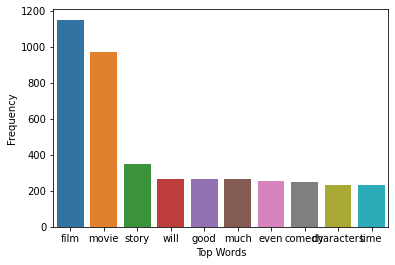

In [73]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
sns.barplot(x="Top Words",y="Frequency",data=words_freq);


In [75]:
##reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  ##[word for word in x if word not in 
                  ## ["s", "nt", "rrb", "lrb", "one"]]) # more "stop" words 
# or I could do it by length: are there gpoing to be key words that are <4 characters??
##reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  ##[word for word in x if len(word)>3]]) # more "stop" words 


In [76]:
##words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                         ## )).most_common(10), 
                          ##columns=['Top Words', 'Frequency'])
##ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
##plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees


# Lets talk about the str.join() method

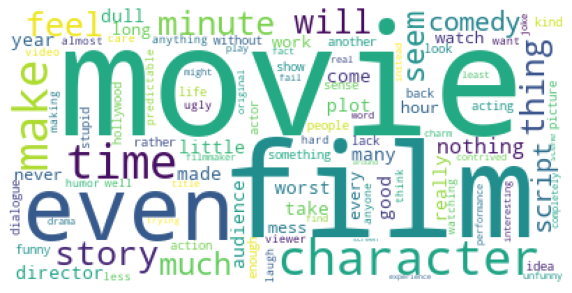

In [74]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")

#plot the word cloud for sentiment 0
wc(reviews[reviews["Sentiment"]==0]["Phrase"].sum(), bgcolor="white")

In [ ]:

#plot the word cloud for sentiment 4

# last step: sentiment analysis

In [ ]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.7 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
sid_obj = SentimentIntensityAnalyzer()
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")
 

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [ ]:
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


In [ ]:
# calculate the sentiment for each review
# group the review by the Sentiment column value from the dataset
# plot on the x axis the Sentiment column [0, 1, 2, 3, 4]
# plot on the y axis the _mean_ sentiment as measured by your code for all reviews with that Sentiment value in the dataset
# include the errorbar on the measured sentiment (use plt.errorbar to do this)
# hint: you may want to use a list comprehension to do this!